In [50]:
# Wine Quality
# Wine has been around for a really long time, almost about 5,000 BC. Have we ever thought why it's been around for so long.
# Because it is easy to make process of simply yeast eating the natural fermentable sugars in grape juice to give
# its main product alcohol. Any fruit juice with fermentable sugars can make wine but grapes being higher on the fruit
# evolutionary ladder on fermentable sugar content we choose grapes for making wine.

# Wine market is huge in US. Accroding to the statistical atudy, the wine sale for this year is estimated to be
# 39.8 billion dollars in US and 60 billion dollars around the globe. With these huge cashflowing business,
# companies are always willing to use technologies to leviate their business to next level and to think about what is next.
# With the remarkable power of Data Science, Machine Learning and Analytics, the company can make use of their data
# to stay ahead of their competition. It helps the exective, directors, mangers to understand their business and
# change statergy, make decision using a data driven approach.

# As a sample study of what way Data Science can aid you in the field of wine business, 
# we have a small Data Science project down here. Lets just get started.

In [51]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn import metrics
from sklearn.model_selection import train_test_split

import graphviz
import matplotlib.pyplot as plt

In [52]:
wineQuality_df = pd.read_csv('winemag-data-130k-v2.csv')

In [53]:
# # Load in data
# from pyspark import SparkFiles
# url = "https://s3.amazonaws.com/zepl-trilogy-test/food.csv"
# spark.sparkContext.addFile(url)
# df = spark.read.csv(SparkFiles.get("food.csv"), sep=",", header=True)
# df.show()

In [54]:
wineQuality_df.head(25)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [55]:
wineQuality_df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [56]:
wineQuality_df=wineQuality_df[['country','price','variety','winery','points']]
wineQuality_df.head(100)

,country,price,variety,winery,points
0,Italy,NaN,White Blend,Nicosia,87
1,Portugal,15.0,Portuguese Red,Quinta dos Avidagos,87
2,US,14.0,Pinot Gris,Rainstorm,87
3,US,13.0,Riesling,St. Julian,87
4,US,65.0,Pinot Noir,Sweet Cheeks,87
5,Spain,15.0,Tempranillo-Merlot,Tandem,87
6,Italy,16.0,Frappato,Terre di Giurfo,87
7,France,24.0,Gewürztraminer,Trimbach,87
8,Germany,12.0,Gewürztraminer,Heinz Eifel,87
9,France,27.0,Pinot Gris,Jean-Baptiste Adam,87


In [57]:
#  Shape is a property not a method and it counts the number of rows and columns
wineQuality_df.shape

(129971, 5)

In [58]:
# # # -----  remove all the rows with empty cells ---------
wineQuality_df.dropna(inplace=True)
#  counts the new number of rows without empty sells
wineQuality_df.shape
# wineQuality_df.head()

(120915, 5)

In [59]:
wineQuality_df.head()

,country,price,variety,winery,points
1,Portugal,15.0,Portuguese Red,Quinta dos Avidagos,87
2,US,14.0,Pinot Gris,Rainstorm,87
3,US,13.0,Riesling,St. Julian,87
4,US,65.0,Pinot Noir,Sweet Cheeks,87
5,Spain,15.0,Tempranillo-Merlot,Tandem,87


In [60]:
# create linear regression model using price only
#  y = mx + b where price is X and y is points
X = wineQuality_df[['price']]
y = wineQuality_df[['points']]

In [61]:
# create linear regression model here
linRegModel = LinearRegression()
linRegModel.fit(X, y)
# print m and b
print(linRegModel.coef_)
print(linRegModel.intercept_)

[[0.03088629]]
[87.32931506]


In [62]:
#  predict/estimate the point values
y_est = linRegModel.predict(X)

In [63]:
# first 10 actual and estimated values of y
print(y[0:10])
print(y_est[0:10])

    points
1       87
2       87
3       87
4       87
5       87
6       87
7       87
8       87
9       87
10      87
[[87.79260943]
 [87.76172314]
 [87.73083685]
 [89.336924  ]
 [87.79260943]
 [87.82349572]
 [88.07058605]
 [87.69995056]
 [88.16324493]
 [87.9161546 ]]


In [64]:
# this model shows that price is not a great indication for a quality wine
print(sklearn.metrics.r2_score(y, y_est))
print(np.sqrt(sklearn.metrics.mean_squared_error(y, y_est)))

0.1732200560273638
2.7686874951398965


In [65]:
# Consider country.  Some countries have wines that are more expensive relative to their quality.

# Label-encode data set for country (to integer)
label_encoder = LabelEncoder()
label_encoder.fit(wineQuality_df.country)
country_integer = label_encoder.transform(wineQuality_df.country)

# from Peter
# wineQuality_df["encoded_countries"] = label_encoder.transform(wineQuality_df.country)
# wineQuality_df.head()

In [66]:
country_integer

array([30, 39, 39, ..., 14, 14, 14], dtype=int64)

In [67]:
# each column represents one country 
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = country_integer.reshape(len(country_integer), 1)
country_onehot = onehot_encoder.fit_transform(integer_encoded)
country_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
wineQuality_df.country.unique()

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China'], dtype=object)

In [69]:
# create linear regression model using price and country as parameters
WinePrice = wineQuality_df[['price']]

#  adding two parameters for a better predection "price" and 'country'
X = np.concatenate((WinePrice, country_onehot), axis=1)
X

array([[15.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  0., ...,  1.,  0.,  0.],
       [13.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [30.,  0.,  0., ...,  0.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  0.,  0.],
       [21.,  0.,  0., ...,  0.,  0.,  0.]])

In [70]:
# create linear regression model here
linRegModel = LinearRegression()
linRegModel.fit(X, y)
# print m (42 dimensional due to one-hot encoding) and b
print(linRegModel.coef_)
print(linRegModel.intercept_)

[[ 0.02975791 -0.96087777  0.12667226  0.59907759  2.33350857 -0.81381192
  -2.9894888   0.55851597  1.37338242 -1.06529488  1.52251958 -0.34708513
  -0.24426222 -0.41346736  3.07096331  0.56881496  0.16176805  1.63698643
  -0.31885334  1.01407147  2.88361204  0.60971793  0.49603719 -0.16926648
   1.03047739 -0.57223214 -2.48178206 -0.23676711  1.04931128  0.56514631
  -3.91684029  0.59467939 -0.99539819 -0.17090684 -0.4179646   0.33229381
   0.15546431 -0.49073082 -0.90833407  0.41401433  0.5361993  -3.14460736
  -0.97526249]]
[86.94183805]


In [71]:
#  predict/estimate the point values
y_est = linRegModel.predict(X)

In [72]:
print(y[0:10])
print(y_est[0:10])

    points
1       87
2       87
3       87
4       87
5       87
6       87
7       87
8       87
9       87
10      87
[[87.98288609]
 [87.89464808]
 [87.86489017]
 [89.41230148]
 [86.89747587]
 [87.91400179]
 [88.22484284]
 [88.93591939]
 [88.31411657]
 [88.04343763]]


In [73]:
# RMSE improved from 2.77 to 2.70 -- some countries have wines that are more expensive relative to their quality.
print(sklearn.metrics.r2_score(y, y_est))
print(np.sqrt(sklearn.metrics.mean_squared_error(y, y_est)))

0.20921091920712498
2.7077546149686014


In [74]:
# next add more attributes (variety) and build another decision model to get a better R*2

In [75]:
wineQuality_df.head()

,country,price,variety,winery,points
1,Portugal,15.0,Portuguese Red,Quinta dos Avidagos,87
2,US,14.0,Pinot Gris,Rainstorm,87
3,US,13.0,Riesling,St. Julian,87
4,US,65.0,Pinot Noir,Sweet Cheeks,87
5,Spain,15.0,Tempranillo-Merlot,Tandem,87


In [76]:
wineQuality_df.variety.nunique()

691

In [77]:
# Label-encode data set for variety (to integer)
label_encoder = LabelEncoder()
label_encoder.fit(wineQuality_df.variety)
variety_integer = label_encoder.transform(wineQuality_df.variety)

In [78]:
variety_integer

array([442, 428, 471, ..., 205, 428, 205], dtype=int64)

In [79]:
# each column represents a type of wine 
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = variety_integer.reshape(len(variety_integer), 1)
variety_onehot = onehot_encoder.fit_transform(integer_encoded)
variety_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
# Now have 3 parameters for a better prediction -- "price", 'country' and type of the wine 'variety'.
X = np.concatenate((WinePrice, country_onehot, variety_onehot), axis=1)

In [81]:
# create linear regression model here with 3 parameters
linRegModel = LinearRegression()
linRegModel.fit(X, y)
# print m and b and notice the number of coef for country and variety
print(linRegModel.coef_)
print(linRegModel.intercept_)

[[ 2.72481379e-02 -1.22289659e+00  1.68751699e+00  4.23822124e-01
   2.42171639e+00 -2.99550919e+00 -2.83329883e+00  7.19965707e-01
   1.40171032e+00 -1.09134635e+00  1.07214274e+00  1.34232000e-01
   6.49401854e-02 -1.14872480e-01  3.19103946e+00  6.08151156e-01
   1.14812003e+00  1.21345913e+00 -3.43222161e-01  8.99397105e-01
   2.60941216e+00  7.05156277e-01  7.91104631e-01  1.62716633e-01
   8.68566640e-01 -7.71168411e-01 -2.50444348e+00 -1.00034277e-01
   1.01488450e+00  4.72122472e-01 -4.08213865e+00 -6.23716637e-03
  -8.14494271e-01  8.18449862e-03 -1.04686993e+00  7.42924091e-01
   2.67455669e-01 -3.86814657e-01 -5.86327479e-01  3.68266558e-01
   5.08037483e-01 -2.97789382e+00 -1.62747720e+00 -5.73425006e-01
   2.10637427e-02  8.50050926e-01 -5.10410448e+00 -4.90337883e+00
   1.12081217e+00 -2.04769430e+00  5.92778665e-01 -5.92657061e-01
  -2.83584503e+00  1.25833159e+00 -7.29438717e-01  1.84394830e+00
  -1.30358158e+00  2.22139434e+00  9.43161465e-01 -1.03473797e+00
   1.28892

In [82]:
#  predict/estimate again the point values with 3 parameters
y_est = linRegModel.predict(X)

In [83]:
# print y value and y estimated values
print(y[0:10])
print(y_est[0:10])

    points
1       87
2       87
3       87
4       87
5       87
6       87
7       87
8       87
9       87
10      87
[[88.59674335]
 [88.23898104]
 [88.473163  ]
 [89.91966193]
 [85.16504396]
 [87.3228871 ]
 [88.58510485]
 [88.86343517]
 [88.69332051]
 [88.06167332]]


In [84]:
# RMSE is now down to 2.63
print(sklearn.metrics.r2_score(y, y_est))
print(np.sqrt(sklearn.metrics.mean_squared_error(y, y_est)))

0.2537883972434265
2.6303283841315794


In [85]:
# quick explanation on regression vs classification:
# Regression and classification are both related to prediction, where regression predicts a value from a continuous set,
# whereas classification predicts the 'belonging' to the class. For example, the price of a house depending on the 'size'
# (in some unit) and say 'location' of the house, can be some 'numerical value' (which can be continuous):
# this relates to regression.
# Similarly, the prediction of price can be in words, viz., 'very costly', 'costly', 'affordable', 'cheap', and 'very cheap':
# this relates to classification.

In [86]:
# Classification trees have dependent variables that are categorical and unordered.
# Regression trees have dependent variables that are continuous values or ordered whole values.
# So we will build regression tree models to predict Points, which is a continuous variable.

In [87]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [88]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [89]:
# Tree model is non-linear and uses interactions -- far better prediction than the linear model: RMSE is down to 2.35
y_pred = regressor.predict(X_test)
print('Large CART model')
print('----------------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('R squared:', metrics.r2_score(y_test, y_pred))

Large CART model
----------------
Mean Absolute Error: 1.8296732237063145
Mean Squared Error: 5.543446786062447
Root Mean Squared Error: 2.3544525448737432
R squared: 0.3929011055496541


In [90]:
# Build a new CART model with fewer leaves (and therefore fewer decision nodes).  leaf_node is a leaf.
Reg = tree.DecisionTreeRegressor(min_samples_leaf=50, max_leaf_nodes=100)
Reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=50,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

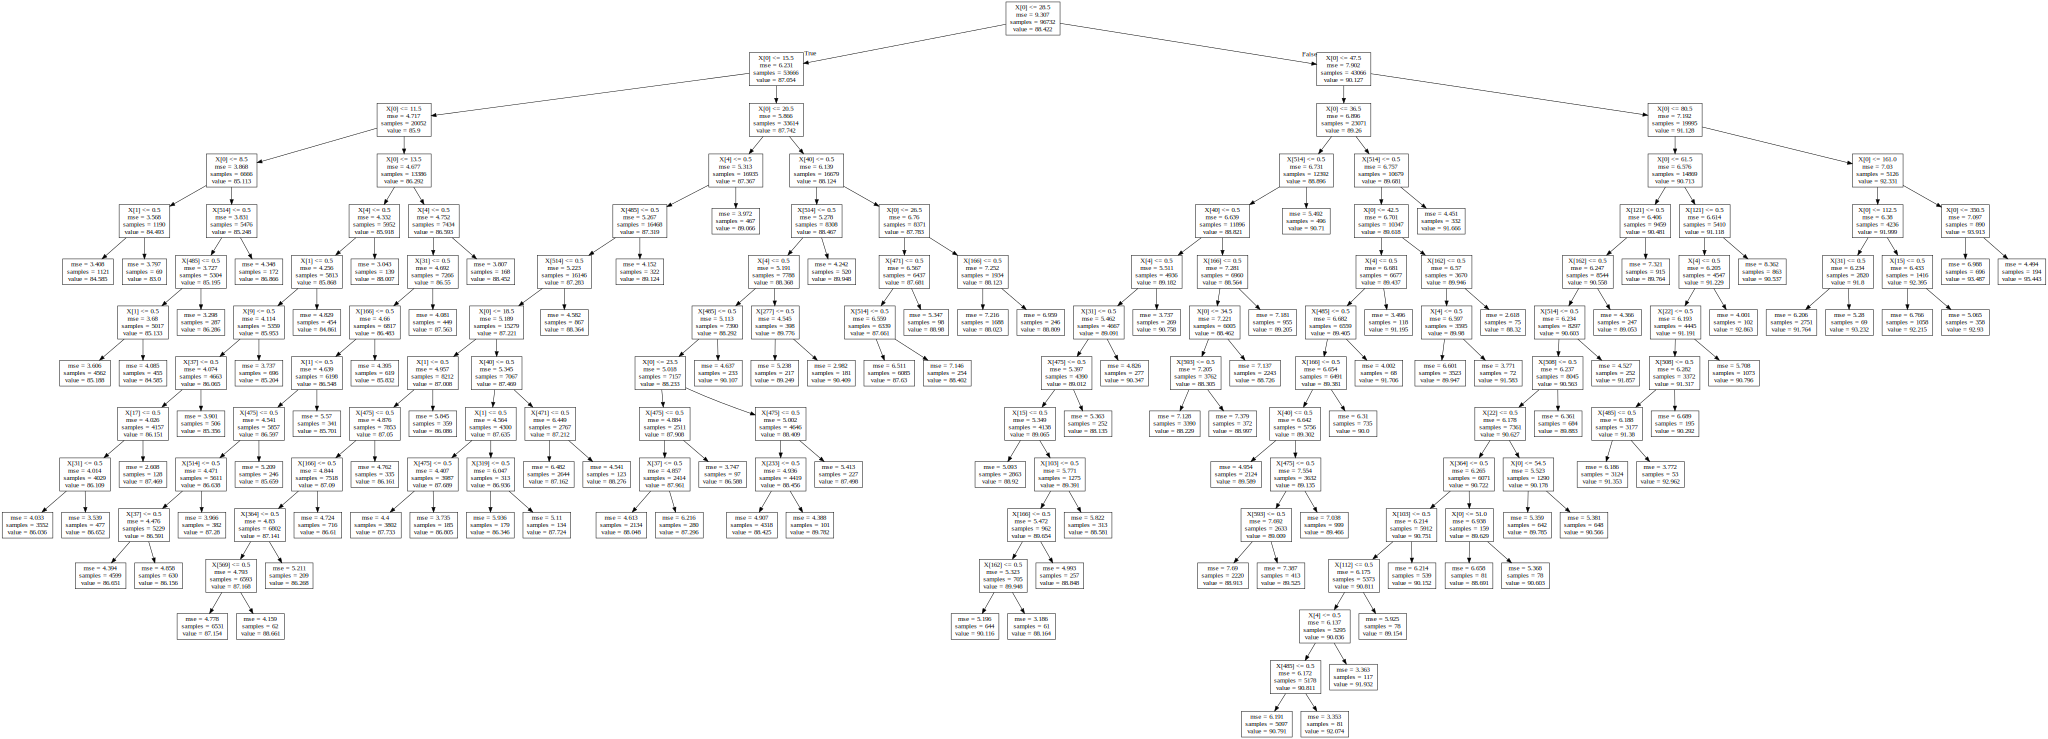

In [91]:
# Examine (visualize) the tree
dot_data = tree.export_graphviz(Reg, out_file=None)

graph = graphviz.Source(dot_data) 
graph

In [92]:
# The performance of the small model is a little better (RMSE = 2.32) than that of the large model on the test data --
# probably the large model overfit the training data.
y_pred = Reg.predict(X_test)
print('Small CART model')
print('----------------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('R squared:', metrics.r2_score(y_test, y_pred))

Small CART model
----------------
Mean Absolute Error: 1.8359500710366419
Mean Squared Error: 5.394190763531053
Root Mean Squared Error: 2.32253972270251
R squared: 0.4092471028624971


In [93]:
# Let's try the get_dummies method rather than onehot_encoder.  get_dummies provides meaningful column names that then
# enable us to label the nodes in the decision tree with human-readable labels like "variety_Albana" rather than "X[7]".
data_binary_encoded = pd.get_dummies(wineQuality_df, columns=["variety", 'country'])
data_binary_encoded.drop(columns=['points', 'winery'], inplace=True)
data_binary_encoded.head()

,price,variety_Abouriou,variety_Agiorgitiko,variety_Aglianico,variety_Aidani,variety_Airen,variety_Albana,variety_Albanello,variety_Albariño,variety_Albarossa,...,country_Serbia,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay
1,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(data_binary_encoded, y, test_size=0.2, random_state=0)

In [95]:
Reg = tree.DecisionTreeRegressor(min_samples_leaf=50, max_leaf_nodes=100)
Reg.fit(X_dtrain, y_dtrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=50,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [96]:
# Yay, it worked -- exactly the same performance as when using onehot_encoder.
y_pred = Reg.predict(X_dtest)
print('Small CART model, "one hot" encoding produced by get_dummies method')
print('----------------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtest, y_pred)))  
print('R squared:', metrics.r2_score(y_dtest, y_pred))

Small CART model, "one hot" encoding produced by get_dummies method
----------------
Mean Absolute Error: 1.8359500710366419
Mean Squared Error: 5.394190763531053
Root Mean Squared Error: 2.32253972270251
R squared: 0.4092471028624971


In [97]:
from graphviz import Source

In [98]:
tree.export_graphviz(Reg,out_file= 'tree.dot')

In [99]:
# This will create a pdf file of the graph not png??  but we have an image to present
graph_test = Source(tree.export_graphviz(Reg, out_file=None,
                                feature_names=X_dtrain.columns))
graph_test.format = 'png'
graph.render('dtree_render', view=True)

CalledProcessError: Command '['dot.bat', '-Tpdf', '-O', 'dtree_render']' returned non-zero exit status 1.

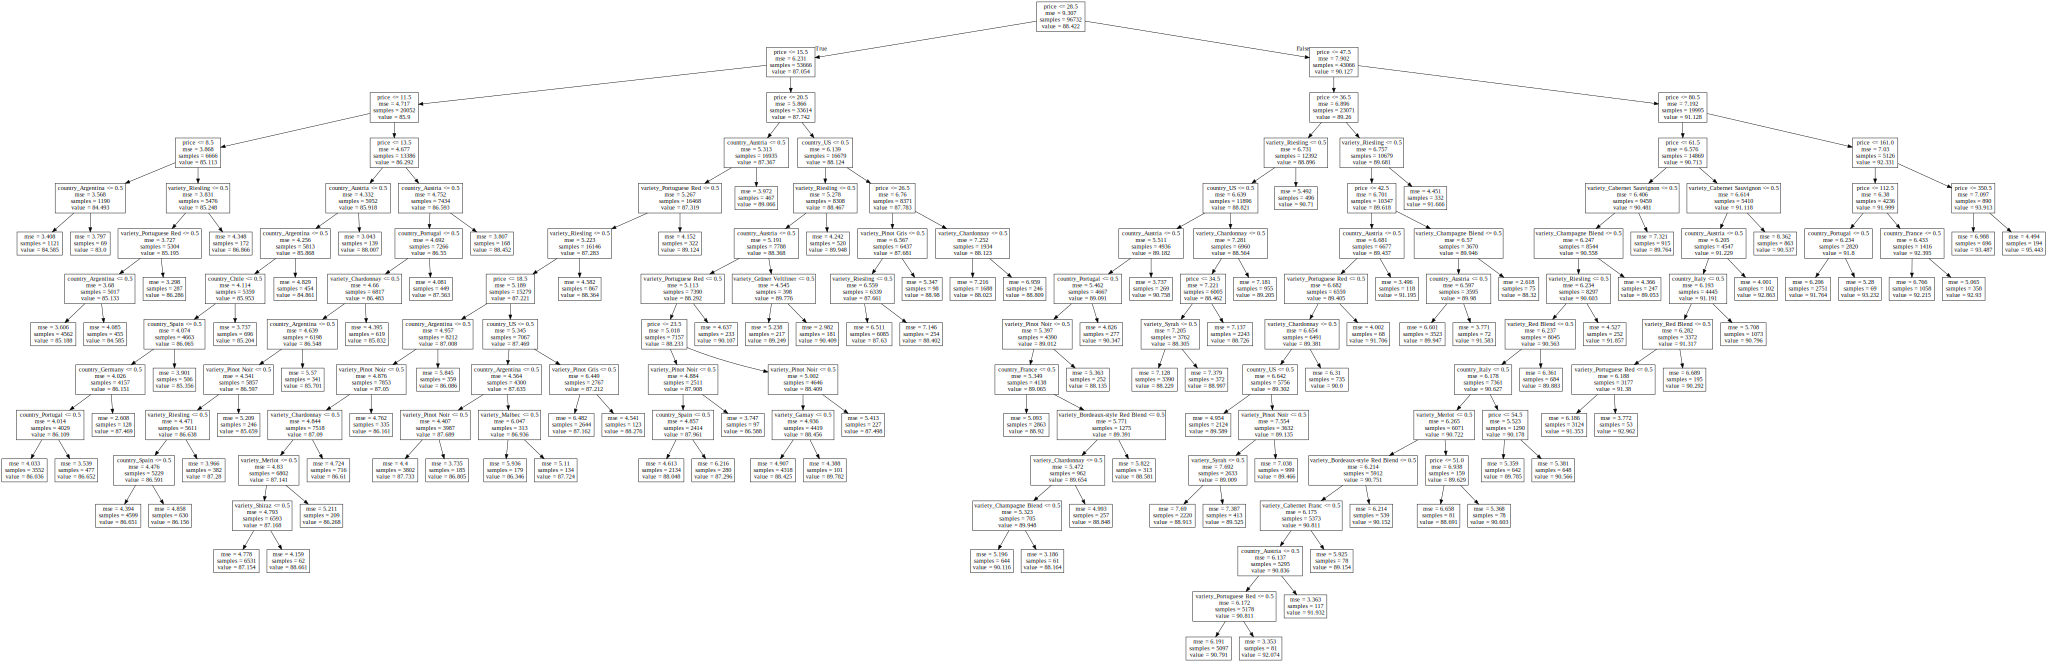

In [100]:
dot_data = tree.export_graphviz(Reg, out_file=None,
                                feature_names=X_dtrain.columns.values)

graph = graphviz.Source(dot_data)
# graph.write_png('tree.png')
graph

In [101]:
# this is not working
# dot_data = tree.export_graphviz(Reg, out_file=None, feature_names=X_train.columns.values) 
                                
# import pydotplus
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('tree.png')

# graph = graphviz.Source(dot_data)  
# graph 

In [102]:
# This is not working
# dot_data = tree.export_graphviz(Reg, out_file=None, feature_names=X_train.columns.values)
# graph = graphviz.Source(dot_data)
# graph.write_png('tree.png')
# graph

In [103]:
# Now, let's fit a gradient boosting regression trees model to the training data and let's see how the approximation progresses
# as we add more and more trees. The scikit-learn gradient boosting estimators allow you to evaluate the prediction of a model as
# a function of the number of trees via the staged_(predict|predict_proba) methods. These return a generator that iterates
# over the predictions as you add more and more trees.  But we are not using this feature right now....
# R2 improves by a good fraction

In [104]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
Reg = GradientBoostingRegressor(**params)
Reg.fit(X_dtrain, y_dtrain)

C:\Programs\Anaconda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [105]:
# Test set RMSE drops to 2.31.  Training and test set performance is similar, so it doesn't look like we have overfit much.
# Could probably improve test set performance by allowing still more estimators.
y_pred = Reg.predict(X_dtrain)
print('GBRT Model training data')
print('----------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtrain, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtrain, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtrain, y_pred)))  
print('R squared:', metrics.r2_score(y_dtrain, y_pred))
print()

y_pred = Reg.predict(X_dtest)
print('GBRT Model')
print('----------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtest, y_pred)))  
print('R squared:', metrics.r2_score(y_dtest, y_pred))

GBRT Model training data
----------
Mean Absolute Error: 1.8469152122749422
Mean Squared Error: 5.41512480374808
Root Mean Squared Error: 2.3270420717615057
R squared: 0.4181554970432678

GBRT Model
----------
Mean Absolute Error: 1.8291020096170014
Mean Squared Error: 5.332241702091997
Root Mean Squared Error: 2.3091647195667955
R squared: 0.41603154729992653


In [106]:
# Next part we will be using Random Forest Classifier for our prediction
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset
# and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as
# the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [107]:
data_binary_encoded = pd.get_dummies(wineQuality_df, columns=["variety", 'country'])
data_binary_encoded.drop(columns=['points', 'winery'], inplace=True)
data_binary_encoded.head()

,price,variety_Abouriou,variety_Agiorgitiko,variety_Aglianico,variety_Aidani,variety_Airen,variety_Albana,variety_Albanello,variety_Albariño,variety_Albarossa,...,country_Serbia,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay
1,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [108]:
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(data_binary_encoded, y, test_size=0.2, random_state=0)

In [109]:
np.unique(y_dtrain)

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [110]:
# Due to an error, changing object type to integer 
y_dtrain = y_dtrain.astype(int)
# y_dtrain

In [ ]:
#  Try CART madel using DecisionTreeRegressor using one more variable "winery"

In [ ]:
Reg = tree.DecisionTreeRegressor(min_samples_leaf=50, max_leaf_nodes=100)
Reg.fit(X_dtrain, y_dtrain)

In [ ]:
y_pred = Reg.predict(X_dtest)
print('Small CART model, "one hot" encoding produced by get_dummies method')
print('----------------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtest, y_pred)))  
print('R squared:', metrics.r2_score(y_dtest, y_pred))

In [ ]:
# y_pred = regressor.predict(X_test)
# print('Large CART model')
# print('----------------')
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
# print('R squared:', metrics.r2_score(y_test, y_pred))

In [111]:
# y_dtest = y_dtest.astype(int)
# y_dtest

In [112]:
# Can specify parameters of the tree models here.
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_dtrain, y_dtrain)

C:\Programs\Anaconda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
rfc.score(X_dtest, y_dtest)

0.19120870032667575

In [114]:
# The Random Forest model massively overfit the training data.  We chose poor values for max_leaf_nodes and min_samples_split....
# If you use more n_estimators, you can allow more leaves in each tree, but min_samples_leaf=1 and min_samples_split=2 are too
# small even if you have a lot of trees.
y_pred = rfc.predict(X_dtrain)
print('Random Forest model training data')
print('---------------------------------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtrain, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtrain, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtrain, y_pred)))  
print('R squared:', metrics.r2_score(y_dtrain, y_pred))

y_pred = rfc.predict(X_dtest)
print('Random Forest model')
print('-------------------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtest, y_pred)))  
print('R squared:', metrics.r2_score(y_dtest, y_pred))

Random Forest model training data
---------------------------------
Mean Absolute Error: 1.6422176735723442
Mean Squared Error: 5.825610966381342
Root Mean Squared Error: 2.4136302464092014
R squared: 0.3740495667233139
Random Forest model
-------------------
Mean Absolute Error: 1.9914816193193565
Mean Squared Error: 6.9417359301989
Root Mean Squared Error: 2.6347174289093886
R squared: 0.2397653713596012


In [115]:
# We will be adding another feature 'winery' using Random Forest Classifier for our prediction
data_binary_encoded = pd.get_dummies(wineQuality_df, columns=["variety", 'country','winery'])
data_binary_encoded.drop(columns=['points'], inplace=True)
data_binary_encoded.head()

,price,variety_Abouriou,variety_Agiorgitiko,variety_Aglianico,variety_Aidani,variety_Airen,variety_Albana,variety_Albanello,variety_Albariño,variety_Albarossa,...,winery_Ébano,winery_Écluse,winery_Élevée Winegrowers,winery_Éric & Jöel Durand,winery_Ñandú,winery_Órale,winery_Öko,winery_Ökonomierat Rebholz,winery_àMaurice,winery_Štoka
1,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
X_dtrain, X_dtest, y_dtrain, y_dtest = train_test_split(data_binary_encoded, y, test_size=0.2, random_state=0)

In [117]:
np.unique(y_dtrain)

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [118]:
# Due to an error, changing object type to integer 
y_dtrain = y_dtrain.astype(int)
# y_dtrain

In [119]:
# Can specify parameters of the tree models here
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_dtrain, y_dtrain)

C:\Programs\Anaconda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [120]:
y_pred = rfc.predict(X_dtrain)
print('Random Forest model training data')
print('---------------------------------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtrain, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtrain, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtrain, y_pred)))  
print('R squared:', metrics.r2_score(y_dtrain, y_pred))

y_pred = rfc.predict(X_dtest)
print('Random Forest model')
print('-------------------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtest, y_pred)))  
print('R squared:', metrics.r2_score(y_dtest, y_pred))

Random Forest model training data
---------------------------------
Mean Absolute Error: 0.4255261960881611
Mean Squared Error: 1.4812471570938262
Root Mean Squared Error: 1.2170649765291195
R squared: 0.8408429081304283
Random Forest model
-------------------
Mean Absolute Error: 1.8188396807674814
Mean Squared Error: 6.3966009180002485
Root Mean Squared Error: 2.5291502363442646
R squared: 0.29946665036602504


In [121]:
# Now, let's fit a gradient boosting regression trees model using extra feature 'winery'
# R2 improves by a good fraction

In [ ]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
Reg = GradientBoostingRegressor(**params)
Reg.fit(X_dtrain, y_dtrain)

C:\Programs\Anaconda\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Test set RMSE drops to 2.31.  Training and test set performance is similar, so it doesn't look like we have overfit much.
# Could probably improve test set performance by allowing still more estimators.
y_pred = Reg.predict(X_dtrain)
print('GBRT Model training data')
print('----------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtrain, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtrain, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtrain, y_pred)))  
print('R squared:', metrics.r2_score(y_dtrain, y_pred))
print()

y_pred = Reg.predict(X_dtest)
print('GBRT Model')
print('----------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_dtest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtest, y_pred)))  
print('R squared:', metrics.r2_score(y_dtest, y_pred))

In [ ]:
# dot_data = tree.export_graphviz(Reg, out_file=None,
#                                 feature_names=X_dtrain.columns.values)

# graph = graphviz.Source(dot_data)
# graph

In [ ]:
# pred_rfc = rfc.predict(X_dtrain)
# print('RFC Model training data')
# print('----------')
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtrain, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_dtrain, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtrain, y_pred)))  
# print('R squared:', metrics.r2_score(y_dtrain, y_pred))

# pred_rfc = rfc.predict(X_dtest)
# print('RFC Model')
# print('----------')
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_dtest, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_dtest, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_dtest, y_pred)))  
# print('R squared:', metrics.r2_score(y_dtest, y_pred))

In [ ]:
# params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#           'learning_rate': 0.01, 'loss': 'ls'}
# Reg = GradientBoostingRegressor(**params)
# Reg.fit(X_dtrain, y_dtrain)

In [ ]:
# # change colors in decision Tree Regression

# import pydotplus
# from sklearn.datasets import load_iris
# from sklearn import tree
# import collections

# clf = tree.DecisionTreeClassifier(random_state=42)
# iris = load_iris()

# clf = clf.fit(iris.data, iris.target)

# dot_data = tree.export_graphviz(clf,
#                                 feature_names=iris.feature_names,
#                                 out_file=None,
#                                 filled=True,
#                                 rounded=True)
# graph = pydotplus.graph_from_dot_data(dot_data)

# colors = ('brown', 'forestgreen')
# edges = collections.defaultdict(list)

# for edge in graph.get_edge_list():
#     edges[edge.get_source()].append(int(edge.get_destination()))

# for edge in edges:
#     edges[edge].sort()    
#     for i in range(2):
#         dest = graph.get_node(str(edges[edge][i]))[0]
#         dest.set_fillcolor(colors[i])

# graph.write_png('tree.png')

In [ ]:
# Now some NLP!  We will build a vector space and then try a nearest neighbors predictor.
# from gensim.models import Word2Vec